In [ ]:
!pip install sklearn==0.0
!pip install matplotlib
!pip install seaborn
!pip install imblearn==0.0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 129.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 76.6 MB/s eta 0:00:00
  Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=20a5015b9b4938d72e1d4f47f83e5741252f07ca9dd5960b996e5dca944032c3
  Stored in directory: /root/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.9.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached contourpy-1.3.0-cp39-cp39-manylinux_

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  # For handling imbalance

In [ ]:
# Load the dataset
bc_df = pd.read_csv("/work/bc_dataset.csv")
bc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bc_df = bc_df.drop('id', axis=1)  # Drop the `id` column as it does not contribute to prediction
bc_df = bc_df.drop('Unnamed: 32', axis=1)

# Encode the target column (`diagnosis`) into binary labels: 0 = Benign, 1 = Malignant
le = LabelEncoder()
bc_df['diagnosis'] = le.fit_transform(bc_df['diagnosis'])

<Axes: xlabel='diagnosis', ylabel='Count'>

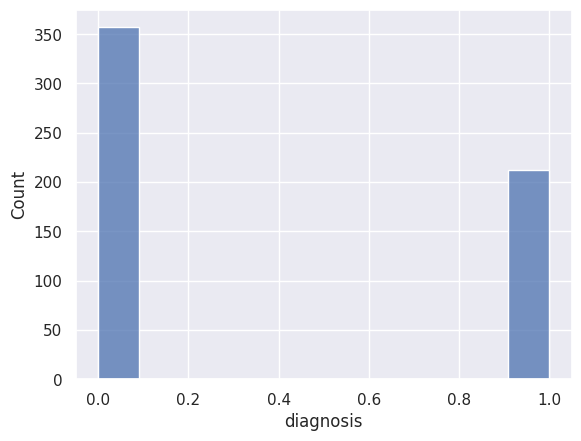

In [ ]:
# plotting the encoded target column to check whether the dataset is balanced or not
sns.set(style ="darkgrid")
sns.histplot(bc_df['diagnosis'])

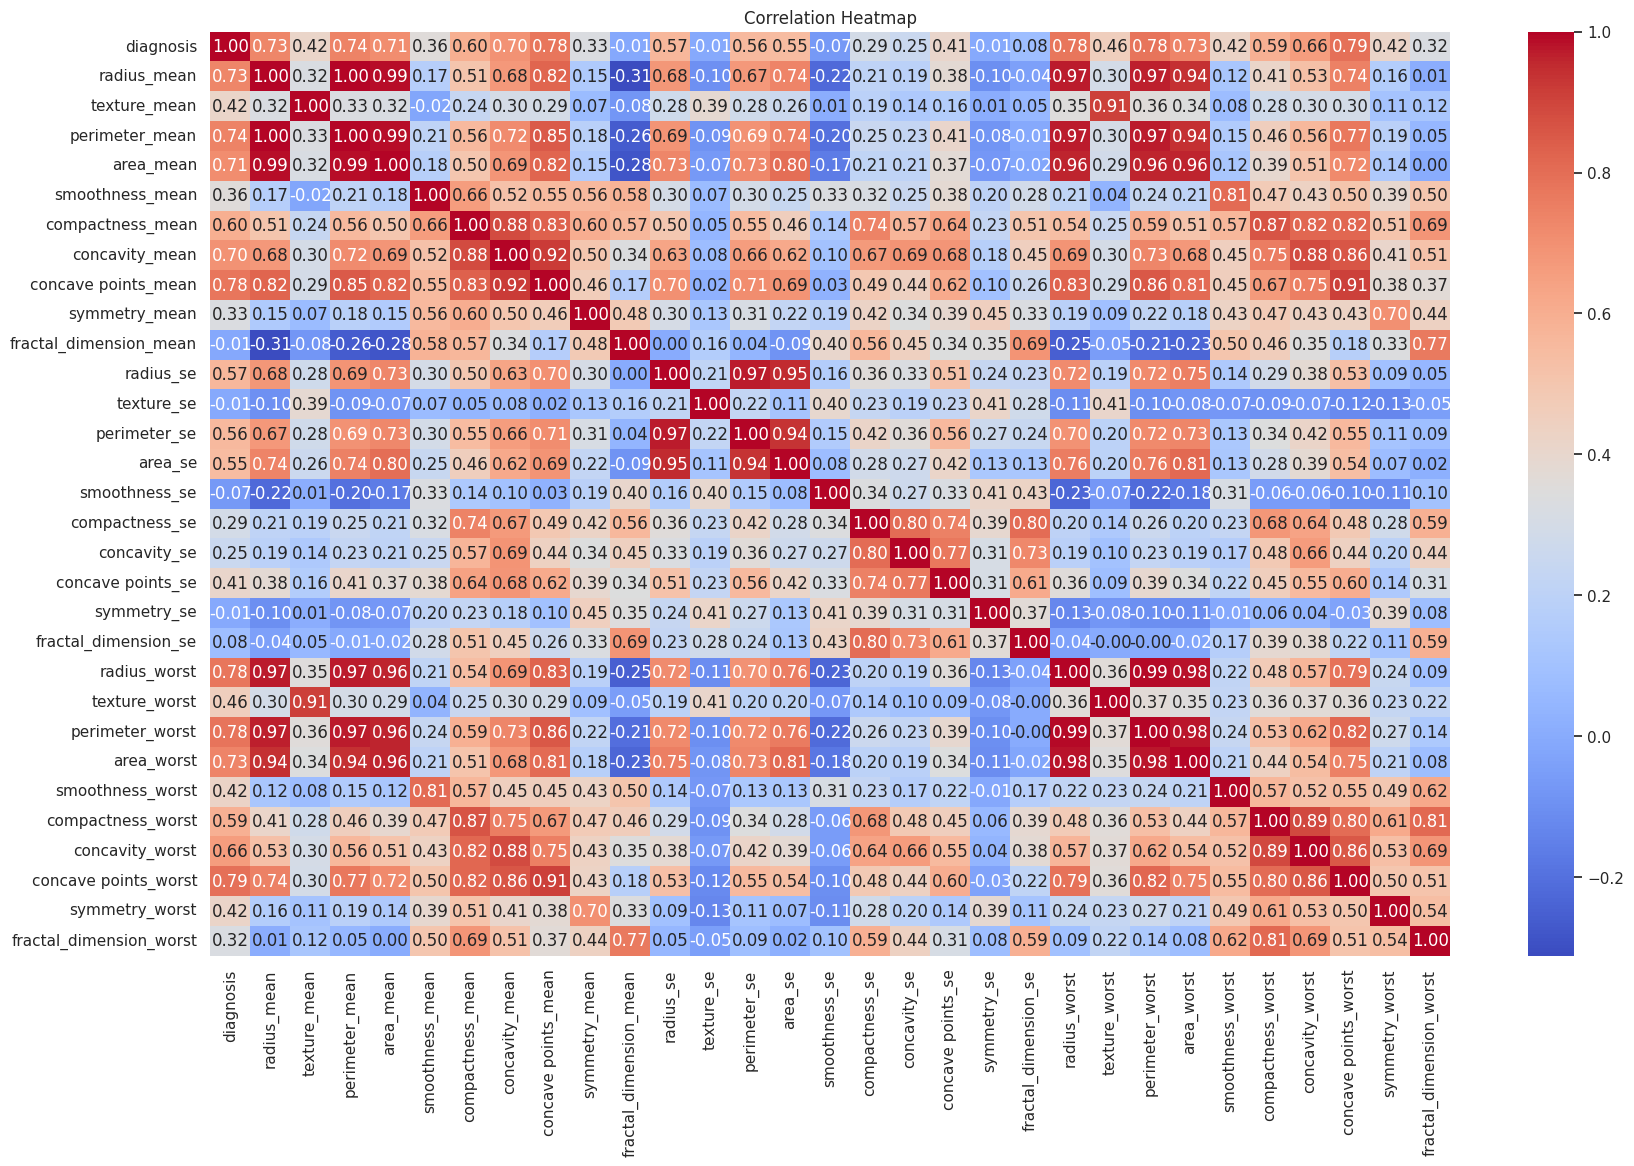

In [ ]:
# Visualize feature correlations using a heatmap
# Helps identify multicollinearity and potential features to drop
plt.figure(figsize=(20, 12))
sns.heatmap(bc_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Drop a low-importance feature based on correlation analysis
# columns with correlations less than 0.0 (negative or negligible correlations with the target variable) were dropped

bc_df = bc_df.drop(columns=['smoothness_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean','fractal_dimension_se'], axis=1)

In [ ]:
# Normalize the dataset using Z-score normalization
# Ensures all features have a mean of 0 and standard deviation of 1, important for models like SVM and KNN

scaler = StandardScaler()
X = scaler.fit_transform(bc_df.iloc[:, 1:].values)
y = bc_df.iloc[:, 0].values

In [ ]:
# Handle class imbalance using SMOTE
# SMOTE generates synthetic samples for the minority class to balance the dataset
#Suitable to be used with Decision Tree and Random Forest models
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

/root/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
# Split the dataset into training and testing sets
# Use 70% for training and 30% for testing, with a fixed random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Function to evaluate model performance
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    """
    Prints classification metrics and plots the ROC curve (if probabilities are provided).
    """
    print(f"--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred)) # Precision, recall, F1-score, and accuracy

    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix to analyze misclassifications
    print("\nConfusion Matrix:")
    print(cm)

    if y_prob is not None: # If probabilities are provided, calculate and plot the ROC curve
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"\nROC-AUC Score: {roc_auc:.4f}")

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.title(f"ROC Curve for {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid()
        plt.show()

# Choosing Machine Learning Algorithms

## Using Decision Tree Model

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.95      0.93      0.94       102

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215


Confusion Matrix:
[[108   5]
 [  7  95]]

ROC-AUC Score: 0.9581


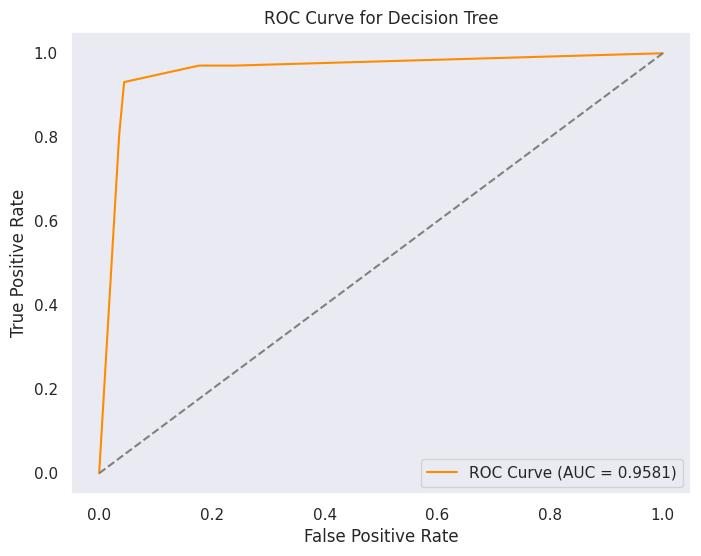

In [ ]:
# Train and evaluate a Decision Tree model
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]  # Extract probabilities for positive class
evaluate_model("Decision Tree", y_test, y_pred, y_prob)

## Using Random Forest Model

--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       113
           1       0.94      0.96      0.95       102

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215


Confusion Matrix:
[[107   6]
 [  4  98]]

ROC-AUC Score: 0.9879


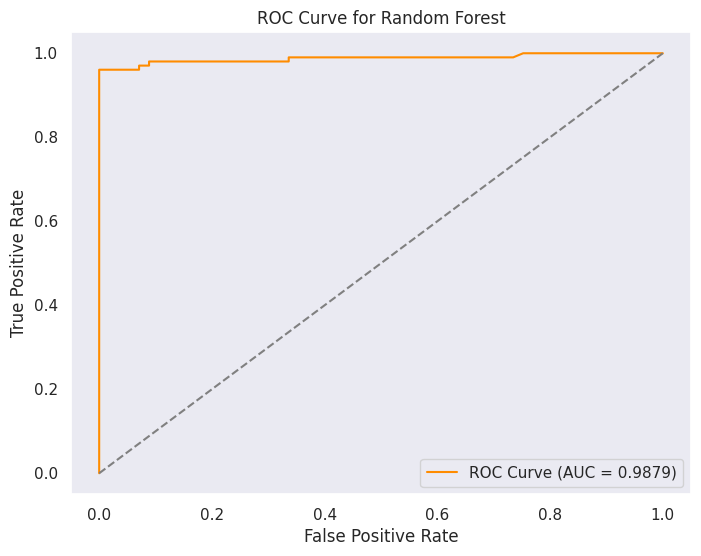

In [ ]:
# Train and evaluate a Random Forest model with hyperparameter tuning
param_dist = {
    "n_estimators": [50, 100, 200],       # Number of trees
    "max_depth": [5, 10, 20],            # Maximum depth of trees
    "min_samples_split": [2, 5, 10],     # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]        # Minimum samples required in a leaf node
}
rf = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_  # Best model from the random search
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]
evaluate_model("Random Forest", y_test, y_pred, y_prob)

## Using KNN

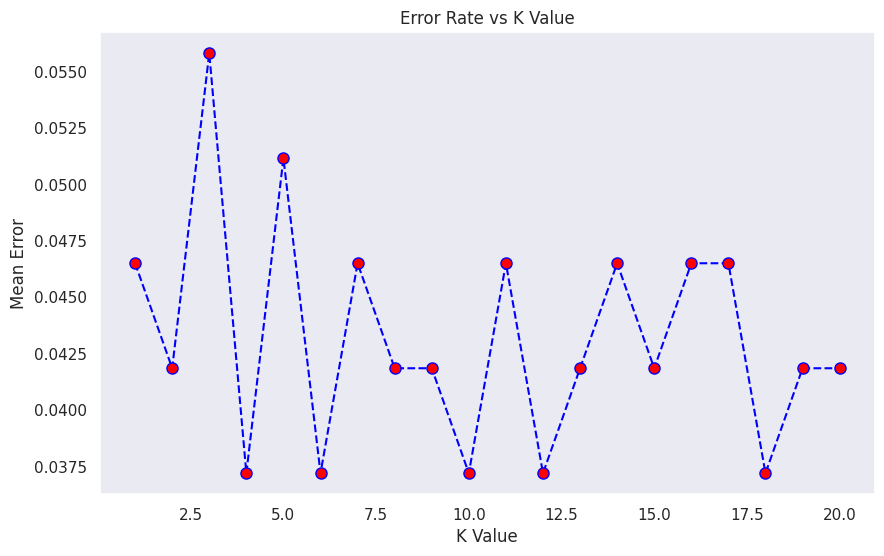

In [ ]:
# KNN Error Plot for K values from 1 to 20
error = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

--- K-Nearest Neighbors ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       113
           1       0.93      0.98      0.95       102

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.96      0.95      0.95       215


Confusion Matrix:
[[105   8]
 [  2 100]]

ROC-AUC Score: 0.9548


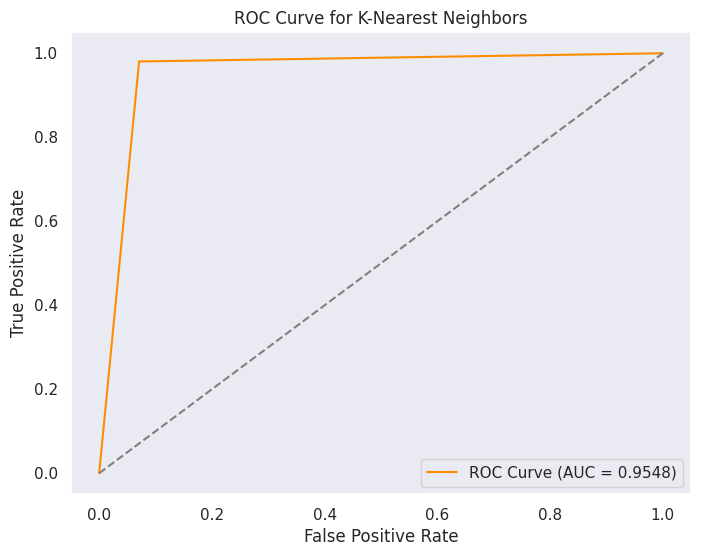

In [ ]:
# Train and evaluate K-Nearest Neighbors (KNN) with hyperparameter tuning
param_grid = {'n_neighbors': range(1, 21)}  # Test K values from 1 to 20
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_  # Best K value from the grid search
y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:, 1]
evaluate_model("K-Nearest Neighbors", y_test, y_pred, y_prob)

## Using SVM

--- Support Vector Machine ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       113
           1       0.95      0.97      0.96       102

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215


Confusion Matrix:
[[108   5]
 [  3  99]]

ROC-AUC Score: 0.9944


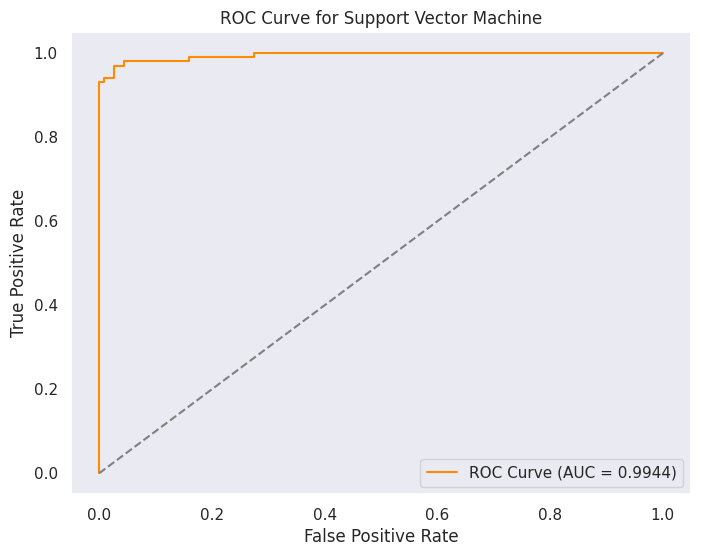

In [ ]:
# Train and evaluate a Support Vector Machine (SVM) with hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'gamma': [1, 0.1, 0.01],   # Kernel coefficient
    'kernel': ['rbf']          # Use the RBF kernel
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='roc_auc')
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_  # Best SVM parameters from the grid search
y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]
evaluate_model("Support Vector Machine", y_test, y_pred, y_prob)

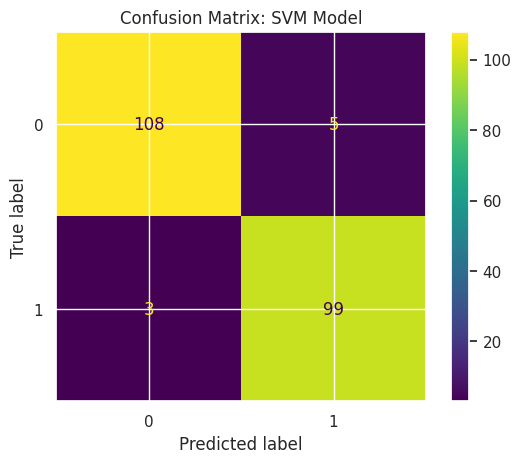

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, best_svm.predict(X_test))
plt.title("Confusion Matrix: SVM Model")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6306bb64-d3bc-481b-953e-3244d7004522' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>